In [16]:
import numpy as np
import sklearn
import pickle
import pandas as pd
import seaborn as sns
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [17]:
# Load the dataset
# There are 4 datasets. We will use the bank_full and bank_additional_full
df_full = pd.read_csv('bank-full.csv',sep=';')
df_addi_full = pd.read_csv('bank-additional-full.csv',sep=';')

In [18]:
# Create a new Consumer confidence index range column. Its values are negative.
df_addi_full['Conf_index_range_neg'] = pd.cut(df_addi_full['cons.conf.idx'], bins=[-55,-50,-45,-40,-35,-30,-25], labels=['55-50','50-45','45-40','40-35','35-30','30-25'])
# Create a new Euribor3m range column
df_addi_full['euribor3m_range'] = pd.cut(df_addi_full.euribor3m, bins=[0,1,2,3,4,5], labels=['0-1','1-2','2-3','3-4','4-5'])
# Create a consumer price index range column
df_addi_full['cons_price_range'] = pd.cut(df_addi_full['cons.price.idx'], bins=[92,93,94,95], labels=['92-93','93-94','94-95'])
# Create Duration range 
df_addi_full['duration_range'] = pd.cut(df_addi_full['duration'], bins=[0,600,1200,1800,2400,3000,3600,4200,4800,5400], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])
# Create age groups
age_group_names = ['young', 'lower middle', 'middle', 'senior']
df_addi_full['age_binned'] = pd.qcut(df_addi_full['age'], 4, labels = age_group_names)
df_addi_full['age_binned'].value_counts()
#Describing dummy keys of the output variable column
y_n_lookup ={'yes' : 1, 'no' : 0}
df_addi_full['y_dummy'] = df_addi_full['y'].map(lambda x: y_n_lookup[x])
df_addi_full['y_dummy'].value_counts()
# Check the df
df_addi_full.head(20)



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,Conf_index_range_neg,euribor3m_range,cons_price_range,duration_range,age_binned,y_dummy
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,lower middle,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,young,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,young,0


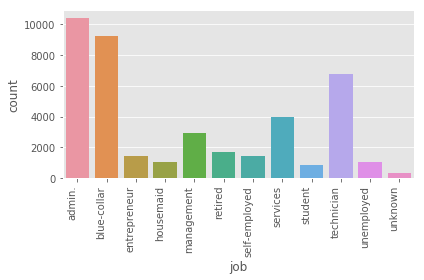

In [19]:
# What are the different job categories and what are their numbers
df_jobs = df_addi_full.sort_values(by=['job'])
ax = sns.countplot(x="job", data=df_jobs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()


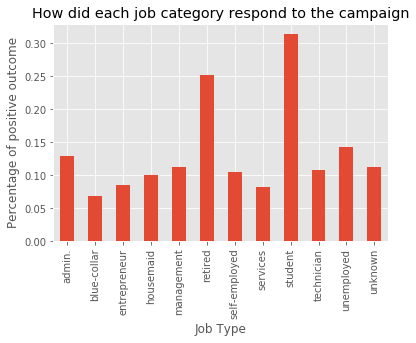

In [20]:
# How did each job category respond to the campaigns
job_type = df_jobs.groupby('job')['y_dummy'].mean()
job_type.plot(x='job_type', y = 'y_dummy', kind = 'bar')
plt.xlabel('Job Type')
plt.ylabel('Percentage of positive outcome')
plt.title('How did each job category respond to the campaign')
plt.show()

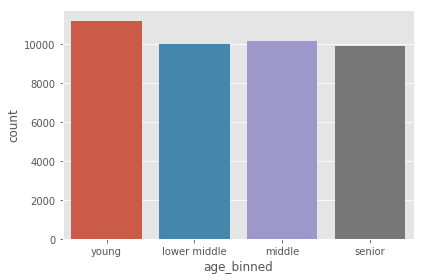

In [21]:
# What are the different age groups and what are their numbers

ax = sns.countplot(x="age_binned", data=df_addi_full)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

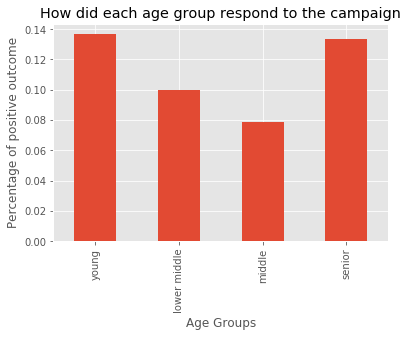

In [22]:
# How did each age group respond to the campaigns
age_response = df_addi_full.groupby('age_binned')['y_dummy'].mean()
age_response.plot(x='age_response', y = 'y_dummy', kind = 'bar')
plt.xlabel('Age Groups')
plt.ylabel('Percentage of positive outcome')
plt.title('How did each age group respond to the campaign')
plt.show()

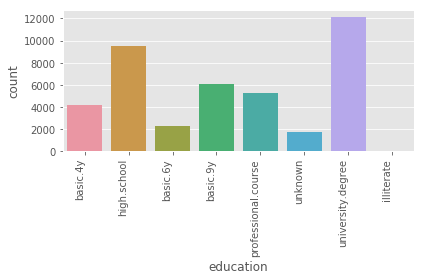

In [23]:
# What are the different education categories and what are their numbers
ax = sns.countplot(x="education", data=df_addi_full)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

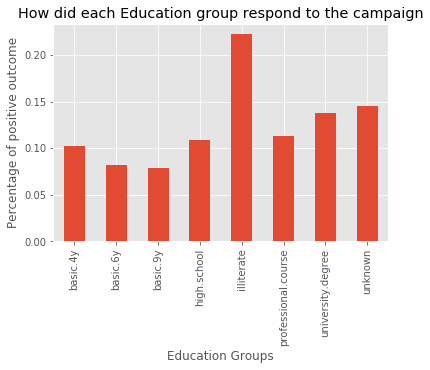

In [24]:
# How did each Education group respond to the campaigns
edu_response = df_addi_full.groupby('education')['y_dummy'].mean()
edu_response.plot(x='edu_response', y = 'y_dummy', kind = 'bar')
plt.xlabel('Education Groups')
plt.ylabel('Percentage of positive outcome')
plt.title('How did each Education group respond to the campaign')
plt.show()

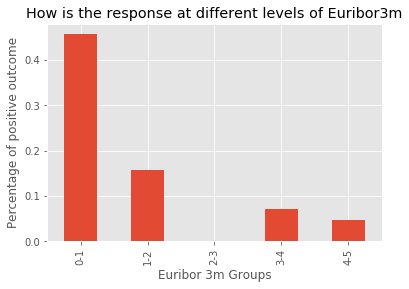

In [25]:
# How is the response to the campaigns at different Euribor levels
euribor_response = df_addi_full.groupby('euribor3m_range')['y_dummy'].mean()
euribor_response.plot(x='euribor_response', y = 'y_dummy', kind = 'bar')
plt.xlabel('Euribor 3m Groups')
plt.ylabel('Percentage of positive outcome')
plt.title('How is the response at different levels of Euribor3m')
plt.show()

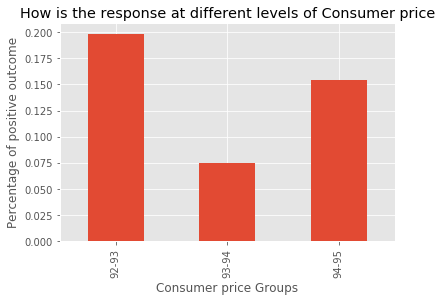

In [26]:
# How is the response to the campaigns at different Euribor levels
cons_price_response = df_addi_full.groupby('cons_price_range')['y_dummy'].mean()
cons_price_response.plot(x='cons_price_response', y = 'y_dummy', kind = 'bar')
plt.xlabel('Consumer price Groups')
plt.ylabel('Percentage of positive outcome')
plt.title('How is the response at different levels of Consumer price')
plt.show()

In [27]:
df_addi_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'Conf_index_range_neg', 'euribor3m_range', 'cons_price_range',
       'duration_range', 'age_binned', 'y_dummy'],
      dtype='object')

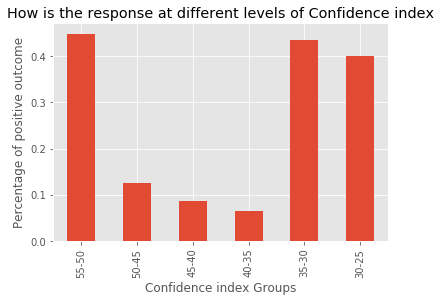

In [28]:

# How is the response to the campaigns at different Confidence index levels
conf_index_response = df_addi_full.groupby('Conf_index_range_neg')['y_dummy'].mean()
conf_index_response.plot(x='conf_index_response', y = 'y_dummy', kind = 'bar')
plt.xlabel('Confidence index Groups')
plt.ylabel('Percentage of positive outcome')
plt.title('How is the response at different levels of Confidence index')
plt.show()

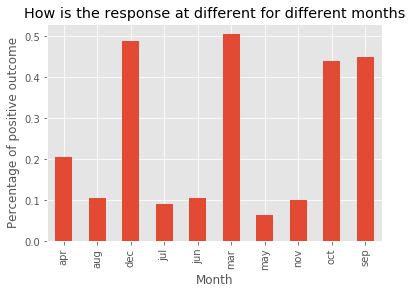

In [29]:
# Is there any differnce of response based on month?

df_month = df_addi_full.sort_values(by=['month'])
month_response = df_month.groupby('month')['y_dummy'].mean()
month_response.plot(x='month_response', y = 'y_dummy', kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Percentage of positive outcome')
plt.title('How is the response at different for different months')
plt.show()

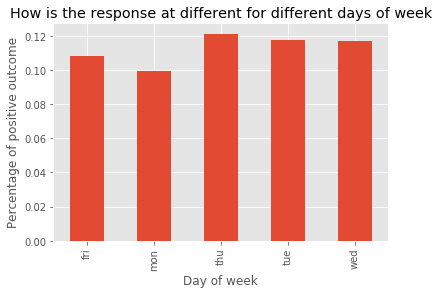

In [30]:
# Is there any differnce of response based on month?

df_week = df_addi_full.sort_values(by=['day_of_week'])
week_response = df_month.groupby('day_of_week')['y_dummy'].mean()
week_response.plot(x='week_response', y = 'y_dummy', kind = 'bar')
plt.xlabel('Day of week')
plt.ylabel('Percentage of positive outcome')
plt.title('How is the response at different for different days of week')
plt.show()